In [1]:
import sys
sys.path.insert(0, '../')
import random
from dasQt import das
import numpy as np
import pathlib
import matplotlib.pyplot as plt

das1 = das.DAS()

# read the data
das1.scale = 100
path_dir = pathlib.Path('/Volumes/TOSHIBA EXT/liaoheyoutian20240127')
files = list(path_dir.glob('*.h5'))

# das1.scale = 0.01
# path_dir = pathlib.Path('/Volumes/TOSHIBA EXT/2024-01-27')
# files = list(path_dir.glob('*.dat'))


# das1.scale = 0.01
# path_dir = pathlib.Path('/Volumes/CSIM_LAB/DATA/Car-JLU-2024-01-31/ovlink/2024-02-01')
# files = list(path_dir.glob('*.dat'))


files = sorted(files)[50:]

2024-03-08 13:35:01,647 INFO	das: 153	
_2024-01-27_05-06-45_UTC.h5 read done!


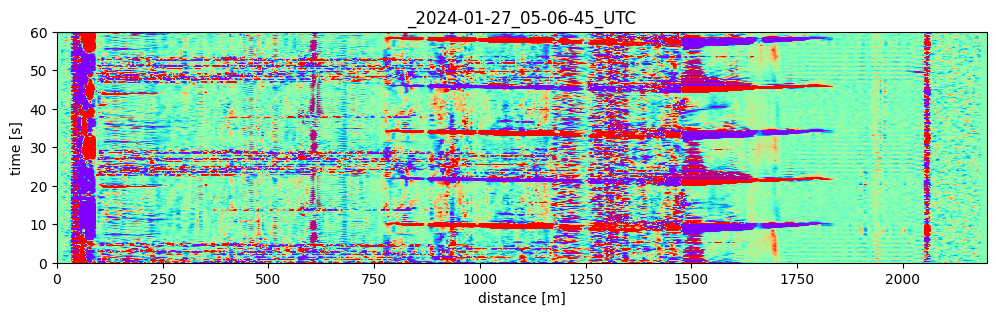

In [2]:
file = random.choice(files)
das1.readData(file)

fig, ax = plt.subplots(1, 1, figsize=(12, 3))
das1.imshowDataAll(ax)
plt.show()

In [6]:
das1.dt, das1.dx

(0.001, 2.9611652)

In [9]:
das1.dt, das1.dx

(0.0025, 4.800000000000001)

In [7]:
def plotSpectrogram(t, data, frequencies, times, Sxx, i):
    with plt.style.context('ggplot'):
        fig, (ax1, ax3) = plt.subplots(2, 1, figsize=(16, 6), sharex=True)

        ax1.plot(t, data)
        ax1.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
        # ax1.set_ylim(-1e3, 1e3)
        # ax1.set_ylim(-3e-1, 3e-1)
        ax1.set_title(f'{i*4.8} (m)')
        # ax1.set_xlabel('Time (s)')
        ax1.set_ylabel('Amplitude')

        ax3.imshow(Sxx, cmap='jet', aspect='auto',
                    extent=[times[0], times[-1], frequencies[0], frequencies[-1]], 
                    origin='lower',interpolation='bilinear',
                    vmin=0, vmax=30000)
        # ax3.set_title('Spectrogram')
        ax3.grid(False)
        ax3.set_xlabel('Time (s)')
        ax3.set_ylabel('Frequency (Hz)')
        # ax3.set_xticklabels([(i+8 * 3600).strftime('%H:%M') for i in times_utc], rotation=315)

        plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0)
        ax1.xaxis.label.set_visible(False)
        # ax1.set_position([0.125, 0.35, 0.775, 0.6])  # [left, bottom, width, height]
        # ax3.set_position([0.125, 0.1, 0.775, 0.25])  # Adjust 'bottom' to move it upwards

        # Optionally, reduce font size of the y-tick labels
        for label in ax1.get_yticklabels():
            label.set_fontsize(8)
        for label in ax3.get_yticklabels():
            label.set_fontsize(8)

        plt.savefig(f'./fig/{i*4.8}.png', dpi=300, bbox_inches='tight')
        plt.close()
        # plt.show()

In [8]:
import pathlib 
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

Fmax = 200

trace = 250
dt = das1.dt
t, data, xf, yf = das1.signalTrace(trace)

i = 1
frequencies, times, Sxx = signal.spectrogram(data, fs=1/dt, 
                                            nperseg=1024*i,      # length of each segment
                                            noverlap=512*i,      # overlap between segments
                                            nfft=1024*i)

index = np.abs(frequencies - Fmax).argmin()
Sxx = Sxx[:index, :]
frequencies = frequencies[:index]
# name = int(file.name.split('.')[0])
name = 100
plotSpectrogram(t, data, frequencies, times, Sxx, name)
